# Importing initial Library


In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm


# Data loading and intial cleaning

In [2]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_WR50.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(9270, 63) (9270,)


# Splitting The data

In [3]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (7416, 63) (7416,)
Test set:  (1854, 63) (1854,)


# Ensuring imputation

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Importing All model Building Library

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [6]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [7]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
sv.fit(X_train, y_train)
gnb.fit(X_train, y_train)
KNN.fit(X_train, y_train)
BC.fit(X_train, y_train)
EC.fit(X_train, y_train)
ADC.fit(X_train, y_train)
GBC.fit(X_train, y_train)
LR.fit(X_train, y_train)
BCR.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

# Predicting the Value

In [8]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)
mnb_pred = mnb.predict(X_test)

# Getting Accuracy and AUC

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)
mnb_acc = accuracy_score(y_test, mnb_pred)

In [10]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)
mnb_auc = roc_auc_score(y_test, mnb_pred)

In [11]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)
print('multinomial: %.6f' % mnb_acc)
print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)
print('multinomial: %.6f' % mnb_auc)

Decision tree acc: 0.722762
Random forest acc: 0.766451
SVM acc: 0.747573
Nabive Baise acc: 0.623517
KNN: 0.708738
BAGGING: 0.722762
Extra tree: 0.763215
ADC Boosting: 0.721143
GDC Boosting: 0.743258
Logistic: 0.710356
BAGGING Random Forest: 0.770766
multinomial: 0.689320

Decision tree AUC: 0.636933
Random forest AUC: 0.702071
SVM AUC: 0.680970
gnb AUC: 0.605494
KNN AUC: 0.647415
Bagging AUC: 0.627888
Extra tree AUC: 0.698008
ADC Boosting: 0.632434
GDC Boosting: 0.655544
Logistic: 0.615325
BAGGING Random Forest: 0.692964
multinomial: 0.598366


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


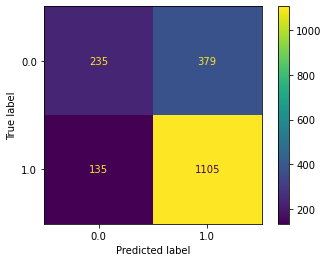

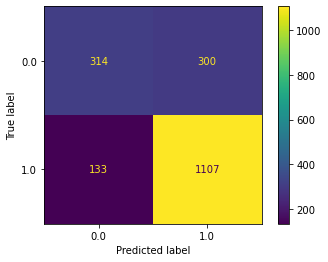

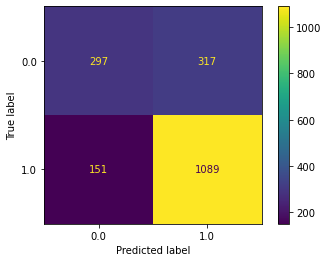

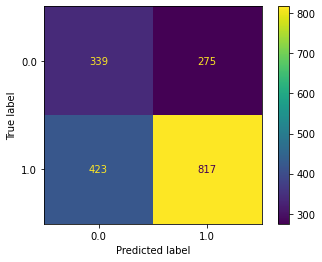

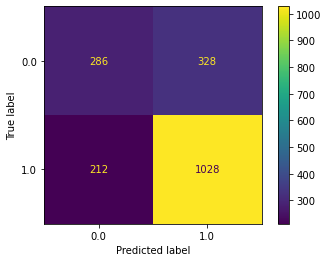

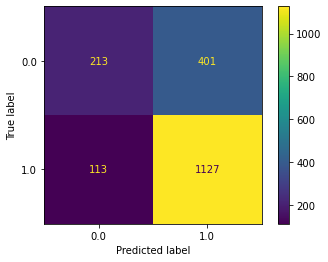

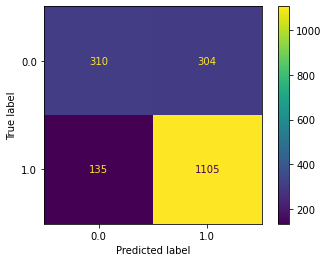

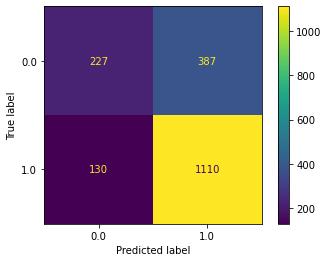

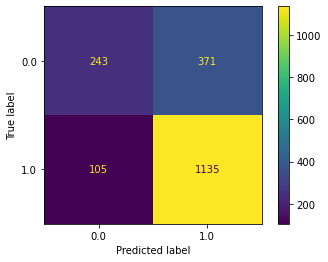

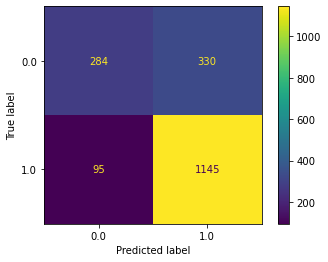

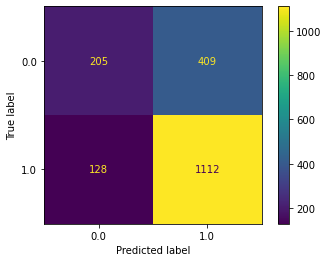

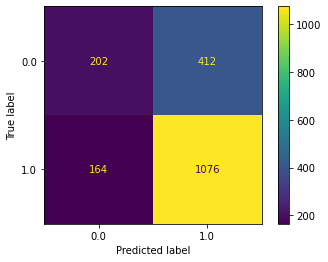

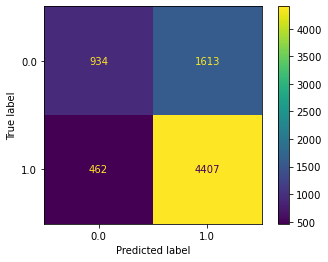

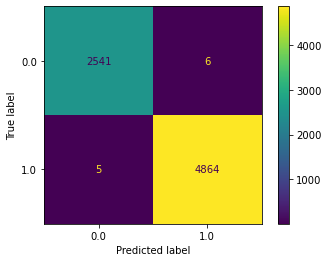

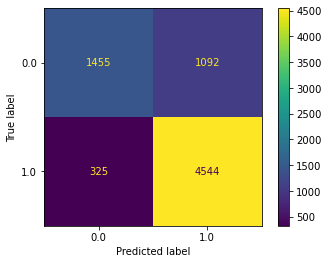

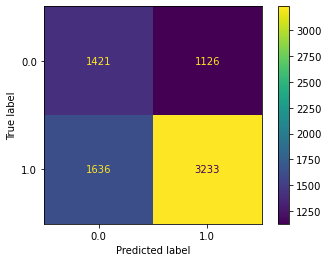

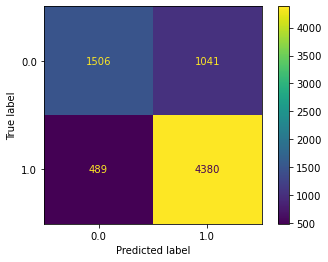

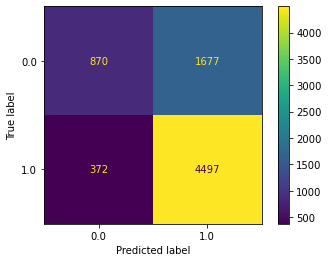

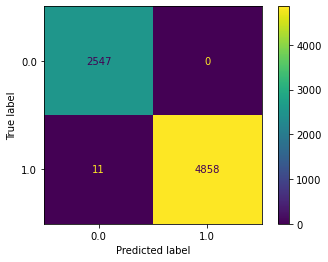

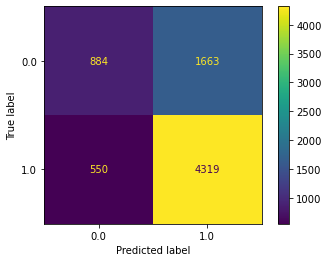

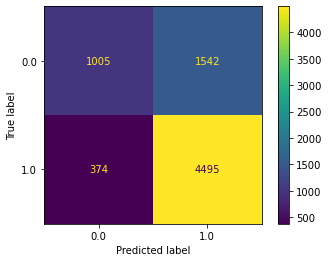

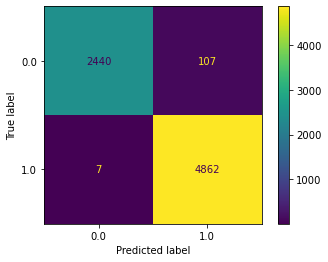

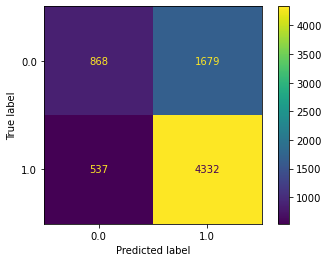

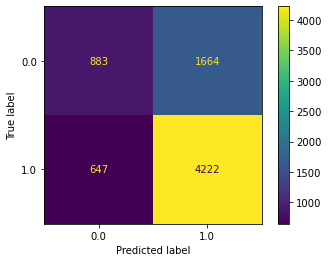

In [12]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)
p12=plot_confusion_matrix(mnb, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)
p24=plot_confusion_matrix(mnb, X_train, y_train)

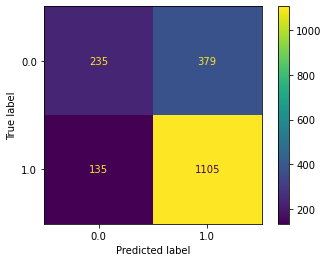

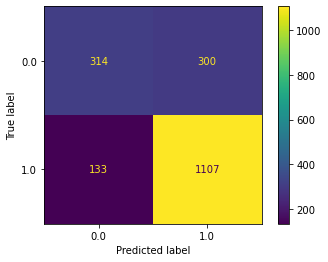

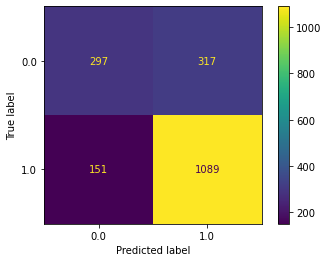

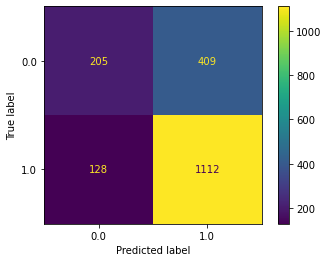

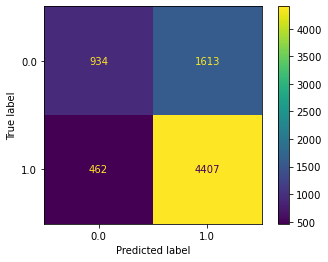

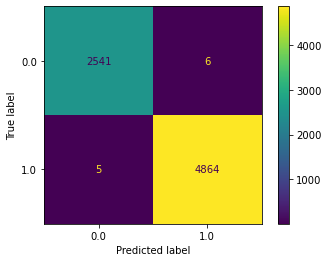

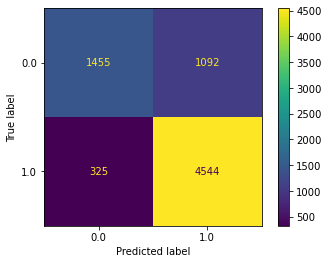

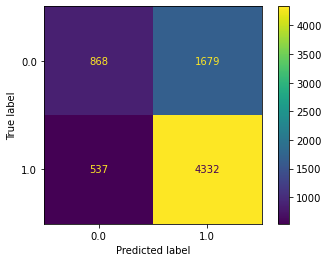

In [13]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

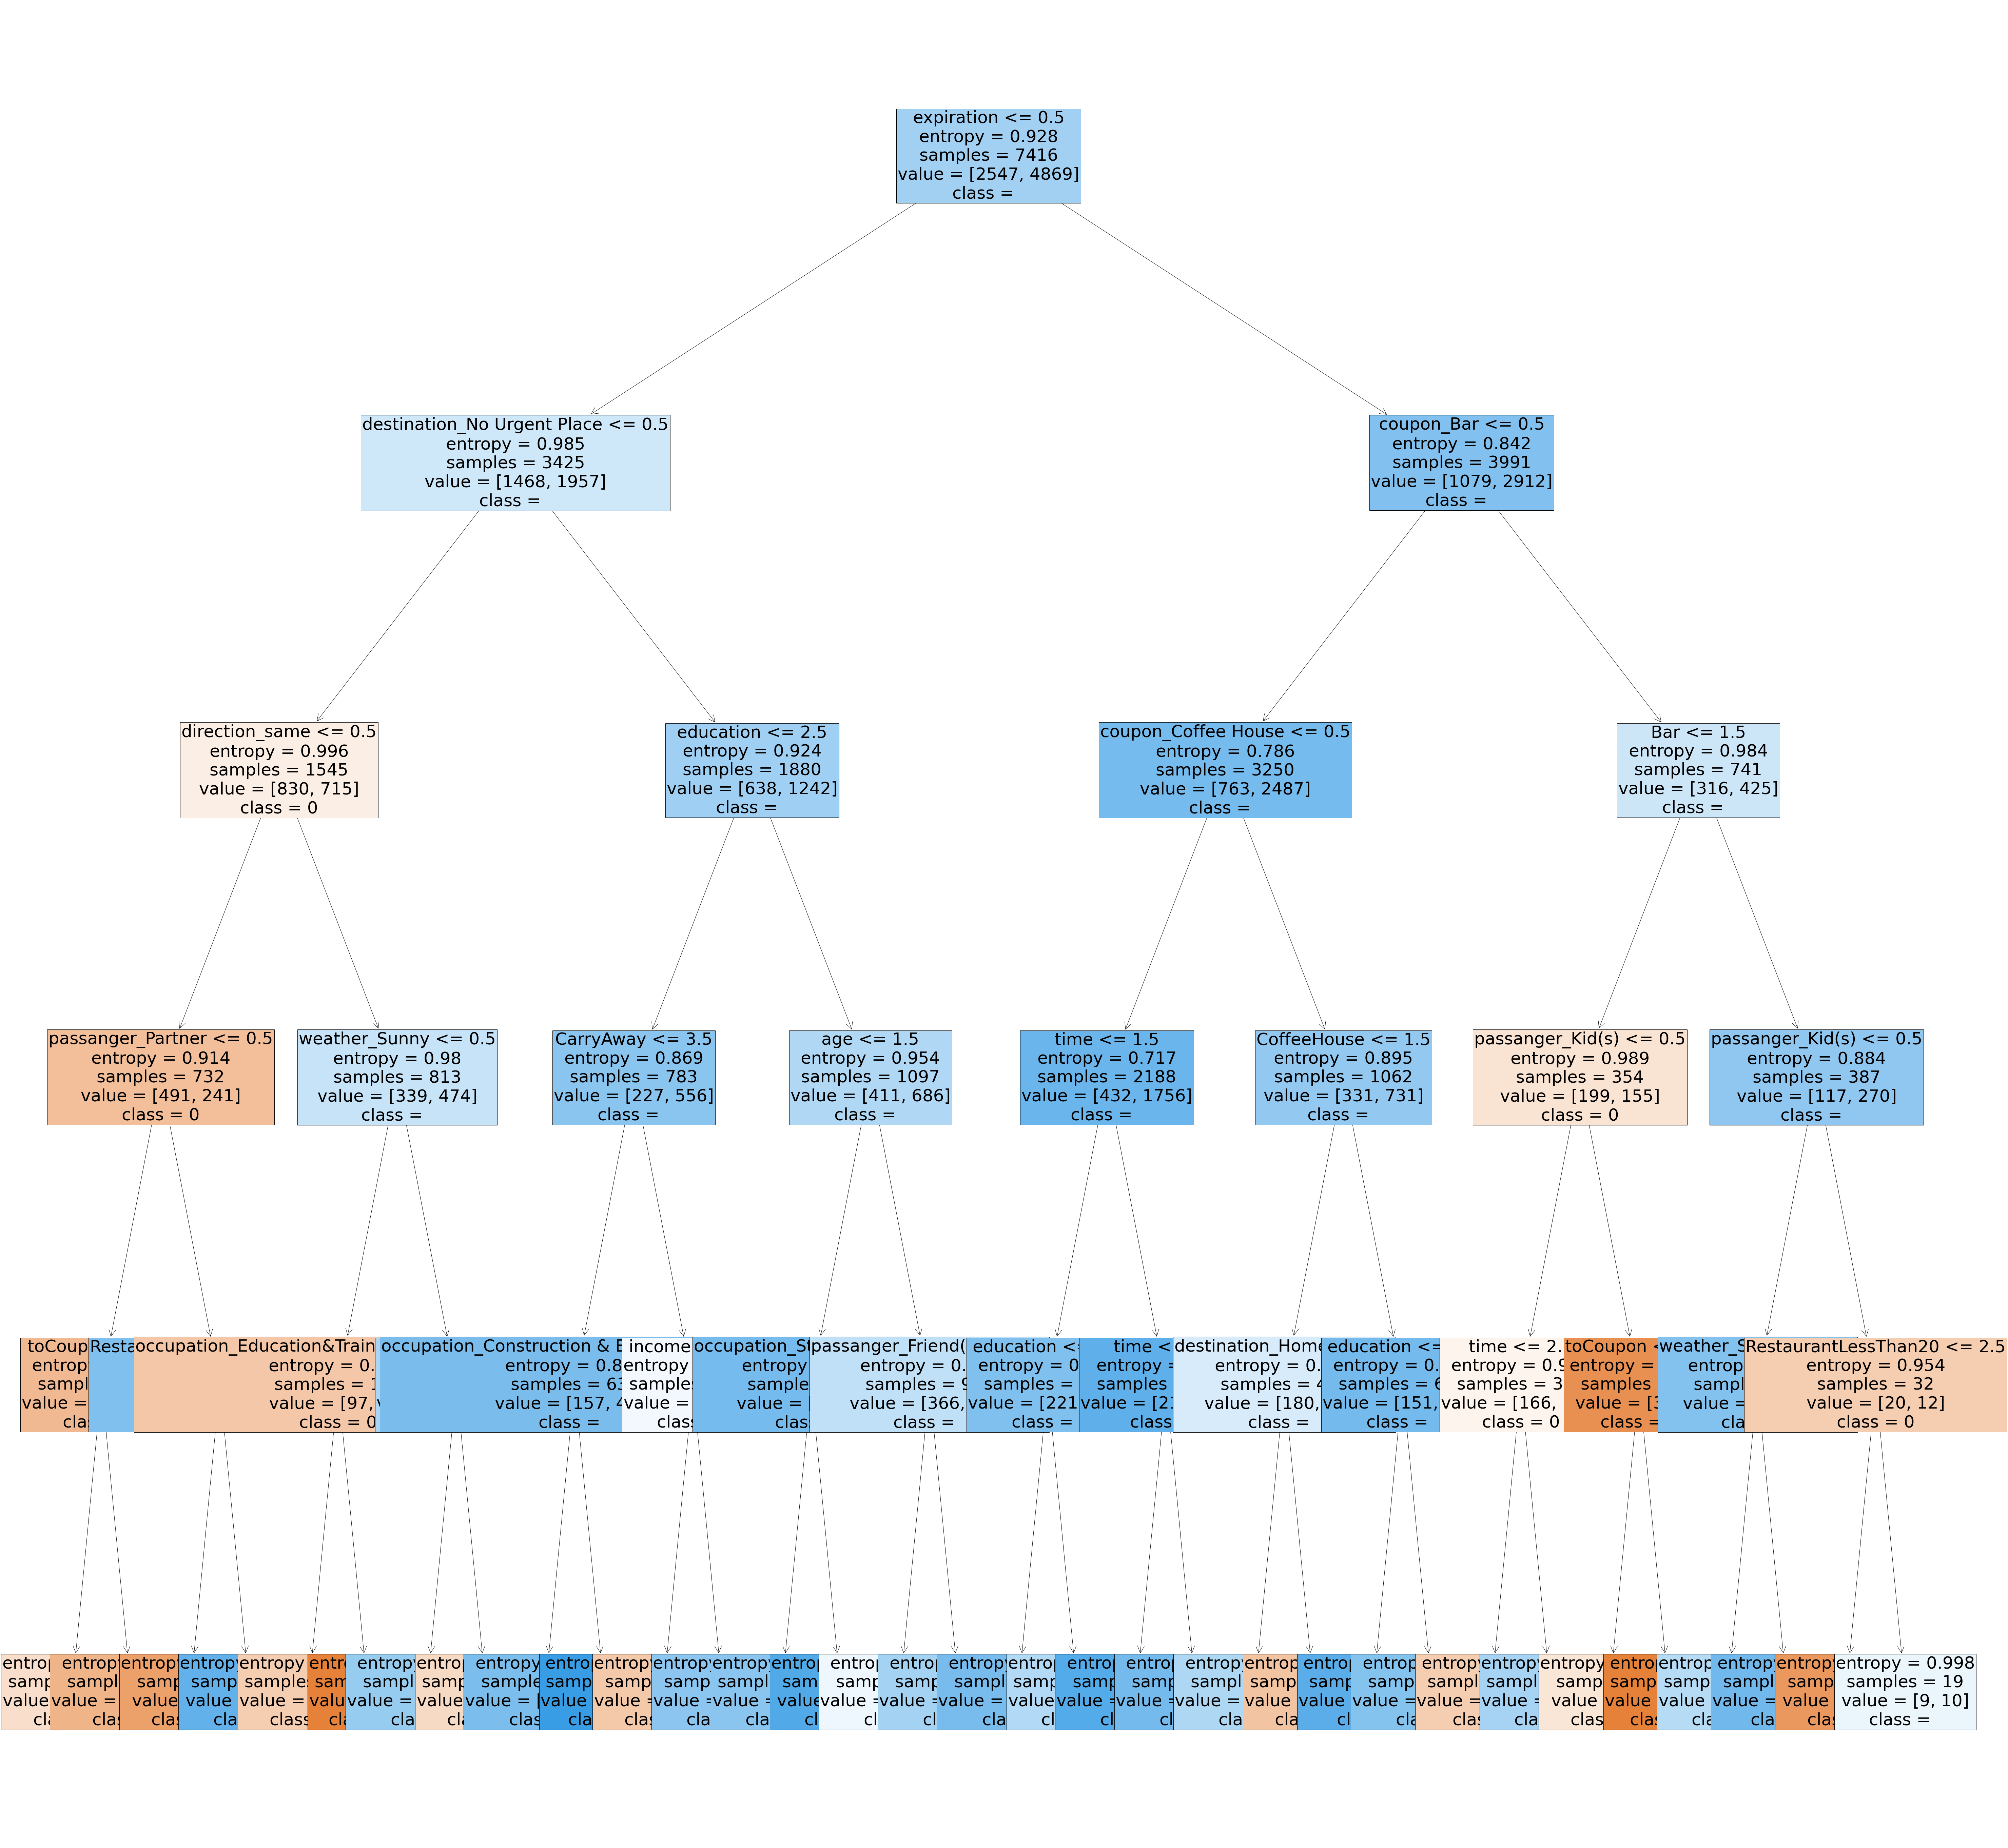

In [14]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_WN_WR50.png')


# Validating the Training set Accuracy

In [15]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)
mnb_pred1 = mnb.predict(X_train)

dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)
mnb_acc1 = accuracy_score(y_train, mnb_pred1)

dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)
mnb_auc1 = roc_auc_score(y_train, mnb_pred1)

print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)
print('multinomial: %.6f' % mnb_acc1)
print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)
print('multinomial: %.6f' % mnb_auc1)

Decision tree acc: 0.720200
Random forest acc: 0.998517
SVM acc: 0.808927
Nabive Baise acc: 0.627562
KNN: 0.793689
BAGGING: 0.723706
Extra tree: 0.998517
ADC Boosting: 0.701591
GDC Boosting: 0.741640
Logistic: 0.701187
BAGGING Random Forest: 0.984628
multinomial: 0.688376

Decision tree AUC: 0.635910
Random forest AUC: 0.998309
SVM AUC: 0.752256
gnb AUC: 0.610954
KNN AUC: 0.745426
Bagging AUC: 0.632588
Extra tree AUC: 0.998870
ADC Boosting: 0.617058
GDC Boosting: 0.658885
Logistic: 0.615252
BAGGING Random Forest: 0.978276
multinomial: 0.606900


In [16]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)
print(mnb)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x1C11E87AB40)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x1C11E87AB40)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x1C11E87AB40),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x1C11E87AB40),
         

# Voting

In [17]:
from sklearn.ensemble import VotingClassifier

In [18]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))



In [19]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7173678532901834


# Explorative data analysis

In [20]:
from matplotlib import pyplot

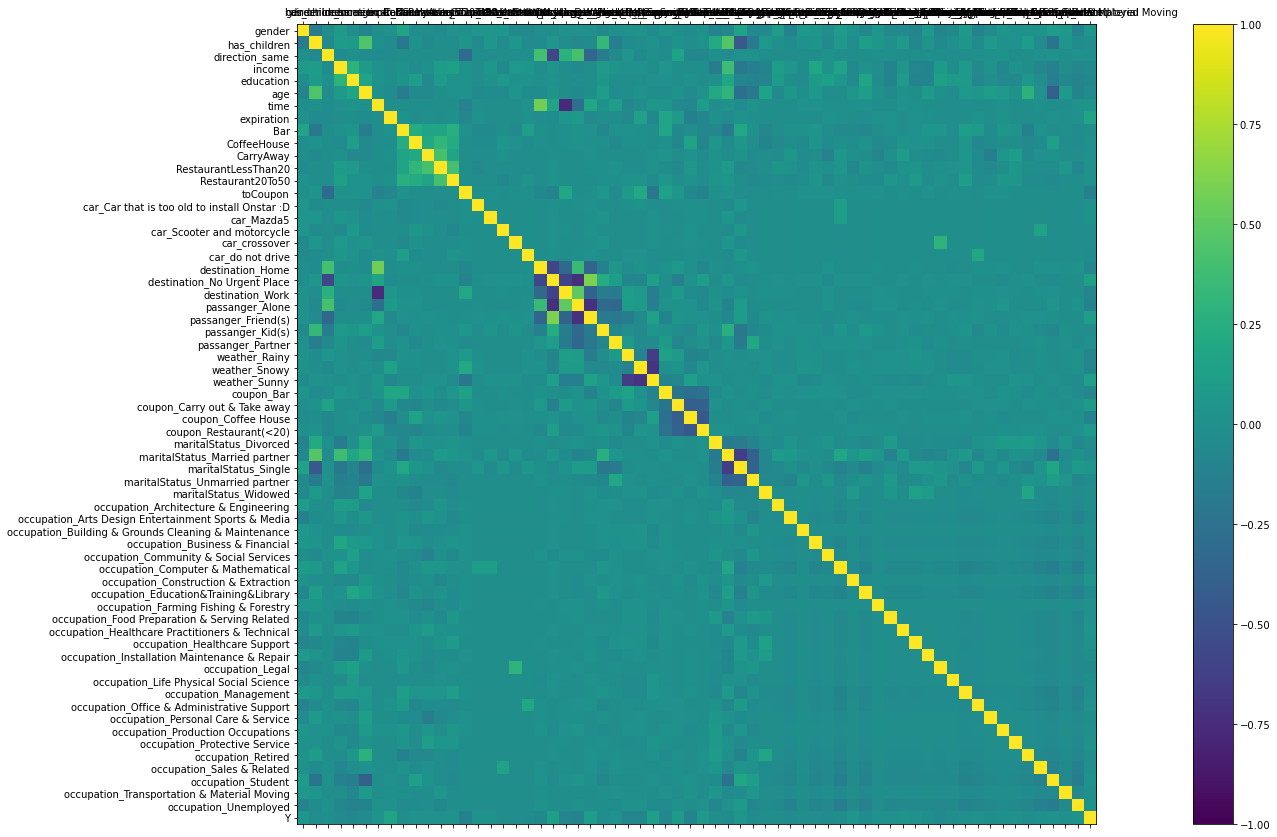

In [22]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure(figsize =(200,50))
ax = fig.add_subplot(353)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df1.head()
ticks = np.arange(0,64,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
x2=pyplot.show()

In [23]:
from pandas.plotting import scatter_matrix

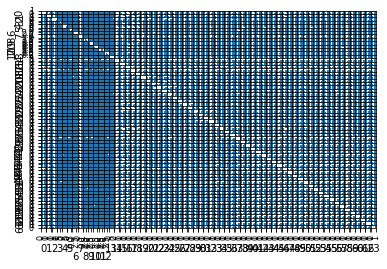

In [24]:
scatter_matrix(df)

pyplot.show()

In [25]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   54   55   56   57  \
0   1.0  1.0  0.0  6.0  4.0  6.0  1.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
1   1.0  1.0  1.0  6.0  4.0  6.0  3.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
2   1.0  1.0  0.0  6.0  4.0  6.0  0.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
3   1.0  0.0  0.0  1.0  3.0  1.0  1.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  0.0  1.0  1.0  3.0  1.0  3.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
5   1.0  0.0  0.0  1.0  3.0  1.0  0.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  4.0  4.0  2.0  1.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
7   1.0  0.0  1.0  4.0  4.0  2.0  3.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  4.0  4.0  2.0  0.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
9   1.0  0.0  0.0  3.0  2.0  2.0  1.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
10  1.0  0.0  1.0  3.0  2.0  2.0  3.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
11  1.0  0.0  0.0  3.0  2.0 

In [26]:
shape = df.shape
print(shape)

(9270, 64)


In [27]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
59    float64
60    float64
61    float64
62    float64
63    float64
Length: 64, dtype: object


In [28]:
from pandas import set_option

In [29]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df1.describe()
print(description)

         gender  has_children  direction_same    income  education  ...  occupation_Sales & Related  occupation_Student  occupation_Transportation & Material Moving  occupation_Unemployed         Y
count  9270.000      9270.000        9270.000  9270.000   9270.000  ...                    9270.000            9270.000                                     9270.000               9270.000  9270.000
mean      0.485         0.404           0.223     3.765      3.160  ...                       0.082               0.127                                        0.019                  0.142     0.659
std       0.500         0.491           0.416     2.569      1.268  ...                       0.275               0.333                                        0.138                  0.349     0.474
min       0.000         0.000           0.000     0.000      0.000  ...                       0.000               0.000                                        0.000                  0.000     0.000
25%       

In [30]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    3161
1    6109
dtype: int64


In [31]:
correlations = df.corr(method='pearson')
print(correlations)

           0      1          2      3          4   ...     59     60     61     62     63
0   1.000e+00 -0.153 -4.181e-04  0.092 -1.954e-02  ...  0.026  0.107  0.068 -0.109  0.052
1  -1.532e-01  1.000 -4.487e-02  0.094  7.903e-02  ... -0.036 -0.223  0.050 -0.024 -0.020
2  -4.181e-04 -0.045  1.000e+00 -0.029  1.141e-04  ...  0.006  0.025 -0.002  0.014  0.005
3   9.189e-02  0.094 -2.857e-02  1.000  2.914e-01  ... -0.072 -0.132 -0.009 -0.074 -0.045
4  -1.954e-02  0.079  1.141e-04  0.291  1.000e+00  ... -0.021 -0.147 -0.066 -0.105 -0.070
..        ...    ...        ...    ...        ...  ...    ...    ...    ...    ...    ...
59  2.646e-02 -0.036  5.590e-03 -0.072 -2.077e-02  ...  1.000 -0.114 -0.042 -0.122  0.007
60  1.067e-01 -0.223  2.514e-02 -0.132 -1.468e-01  ... -0.114  1.000 -0.054 -0.155  0.019
61  6.845e-02  0.050 -2.206e-03 -0.009 -6.649e-02  ... -0.042 -0.054  1.000 -0.057  0.002
62 -1.095e-01 -0.024  1.391e-02 -0.074 -1.048e-01  ... -0.122 -0.155 -0.057  1.000  0.017
63  5.240e

In [32]:
skew = df.skew()
print(skew)

0     0.061
1     0.393
2     1.330
3     0.342
4    -0.118
      ...  
59    3.043
60    2.241
61    6.967
62    2.055
63   -0.671
Length: 64, dtype: float64


In [33]:
skew.to_csv('Skew2_WN_WR50.csv', index=False)

In [34]:
correlations.to_csv('correlations2_WN_WR50.csv', index=False)

In [35]:
description.to_csv('description_WN_WR50.csv', index=False)

# Random Forest Tree

In [36]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

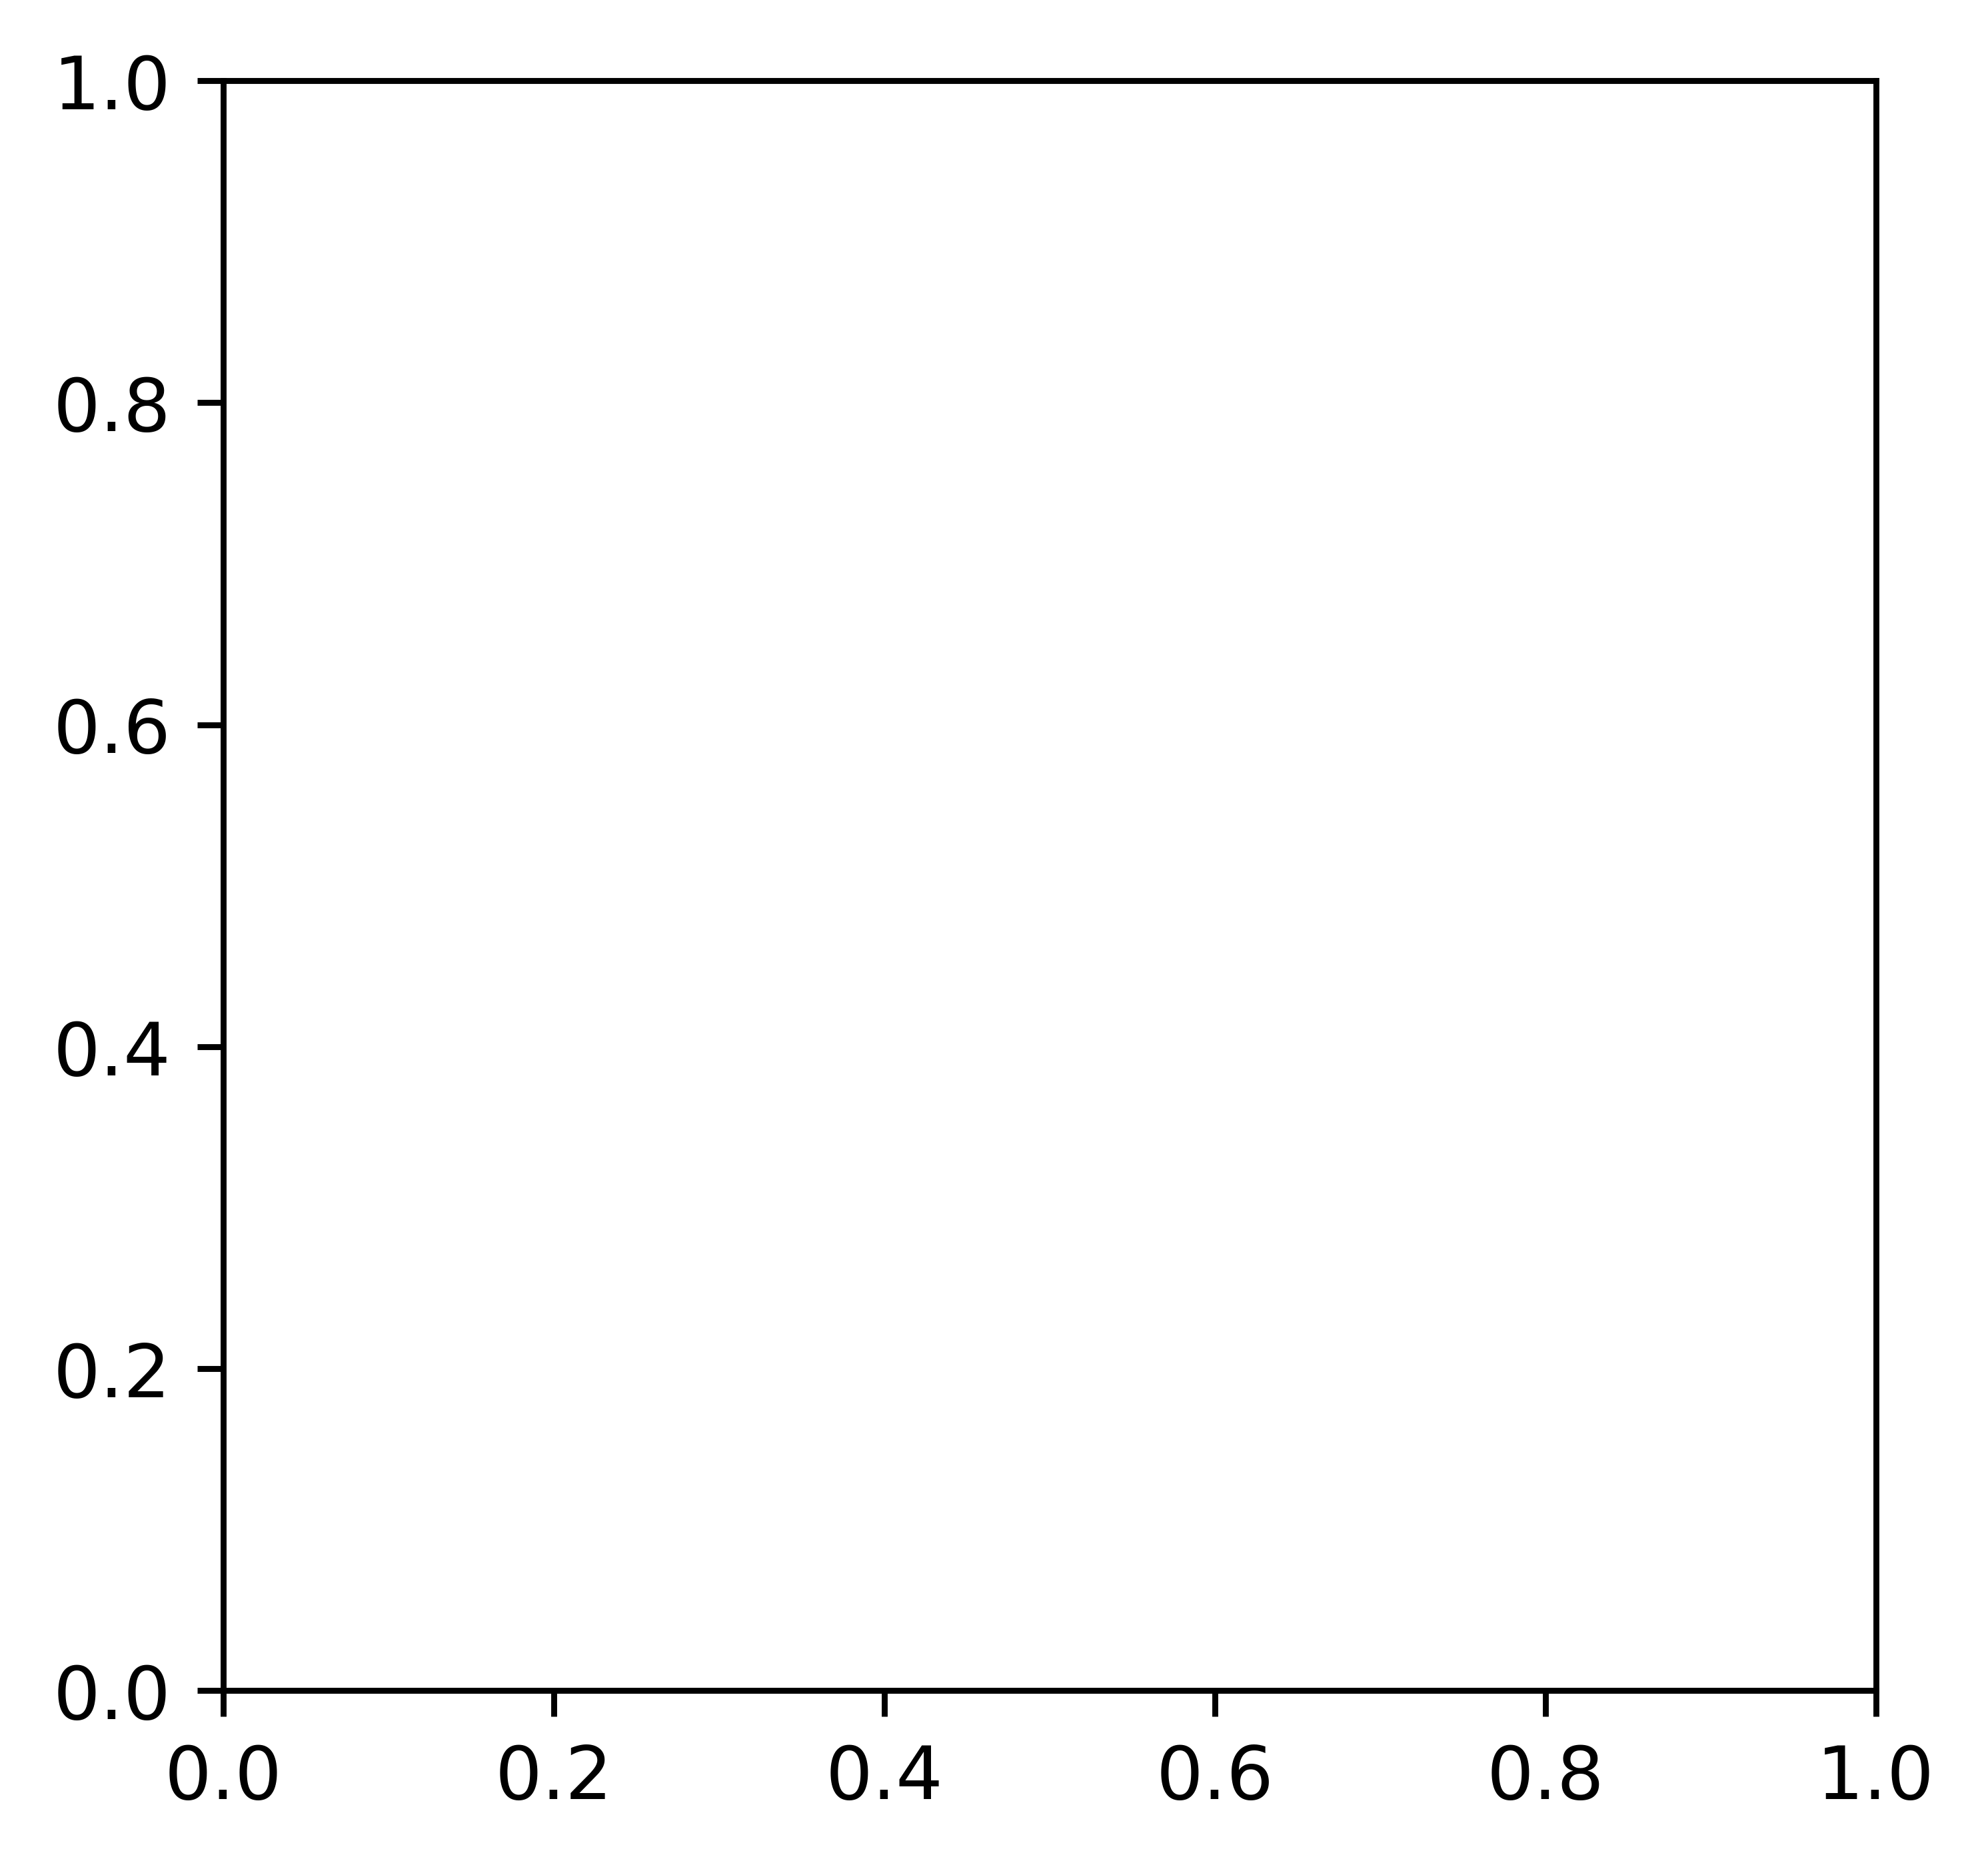

In [37]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_WN_WR50.png')